# Creating Model for Classification(bank data)

In [1]:
#importing the required lib's
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
#reading or extracting bank data using pandas 
df=pd.read_csv('bank-full (1).csv',sep=';')#u can use seperator or delimetter to seprate the all columns which are merged as one
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
#Converting the catagorical data into numerical for classification purpose using Label Encoder,
#also converting object data type into int
df['default']=LabelEncoder().fit_transform(df['default'])
df['housing']=LabelEncoder().fit_transform(df['housing'])
df['loan']=LabelEncoder().fit_transform(df['loan'])
df['y']=LabelEncoder().fit_transform(df['y'])
df.head()#checking the datasets

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [4]:
#finding the data types of the variables and their null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int32 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int32 
 7   loan       45211 non-null  int32 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int32 
dtypes: int32(4), int64(7), object(6)
memory usage: 5.2+ MB


In [5]:
#here i am converting the data type (object type >>> Categorical datatype) this step was not nessary i did it simply time pass
df['job']=df['job'].astype('category')
df['poutcome']=df['poutcome'].astype('category')
df['month']=df['month'].astype('category')
df['contact']=df['contact'].astype('category')
df['education']=df['education'].astype('category')
df['marital']=df['marital'].astype('category')

In [6]:
#finding wether null values present in all the variables
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
#spliting the data based on independent and dependent variable for further processing
x=df.iloc[:,[0,4,5,6,7,9,11,12,13,14]]
y=df.iloc[:,16]

In [8]:
#importing the Standard scaler to scale the data 
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x)
x

array([[ 1.60696496, -0.13548989,  0.25641925, ..., -0.56935064,
        -0.41145311, -0.25194037],
       [ 0.28852927, -0.13548989, -0.43789469, ..., -0.56935064,
        -0.41145311, -0.25194037],
       [-0.74738448, -0.13548989, -0.44676247, ..., -0.56935064,
        -0.41145311, -0.25194037],
       ...,
       [ 2.92540065, -0.13548989,  1.42959305, ...,  0.72181052,
         1.43618859,  1.05047333],
       [ 1.51279098, -0.13548989, -0.22802402, ...,  0.39902023,
        -0.41145311, -0.25194037],
       [-0.37068857, -0.13548989,  0.52836436, ..., -0.24656035,
         1.4761376 ,  4.52357654]])

In [9]:
#spliting the data as train and test
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [10]:
#creating the model and training the model by fitting the data
model=LogisticRegression().fit(X_train,y_train)

#finding the co-efficent beta or slope for all independent variables
model.coef_,model

(array([[-0.03331794, -0.05780513,  0.07823589, -0.62210901, -0.27347654,
         -0.02332803,  1.02548655, -0.42129428,  0.29382825,  0.17188359]]),
 LogisticRegression())

In [11]:
#predecting the test dataset using model
test_prdct=model.predict(X_test)
test_prdct

array([0, 1, 0, ..., 0, 0, 0])

In [12]:
#comparing actual v/s prediction
#creating data frame to compare
newdf=pd.DataFrame({'actual':y_test,'prediction':test_prdct})
newdf

,actual,prediction
14001,0,0
32046,1,1
13318,0,0
42991,0,0
14237,0,0
...,...,...
2666,0,0
35730,0,0
11495,0,0
20975,0,0


In [13]:
#testing accuracy of the model
accuracy_score(y_test,test_prdct)

0.8875700383367738

In [14]:
#predicting train data itself to find the accuracy of training
traning_prdct=model.predict(X_train)

#training accuracy of the model
accuracy_score(y_train,traning_prdct)

0.8903845546181313

In [15]:
#to find the classification of data wheather the data are predicted correct or not by using confusion matrix
confusion_matrix(y_test,test_prdct)

array([[11722,   247],
       [ 1278,   317]], dtype=int64)

In [16]:
#calculating the accuracy by collecting data from Confusion Matrix
((11722+317)/(11722+247+1278+317))*100

88.75700383367739

<AxesSubplot:>

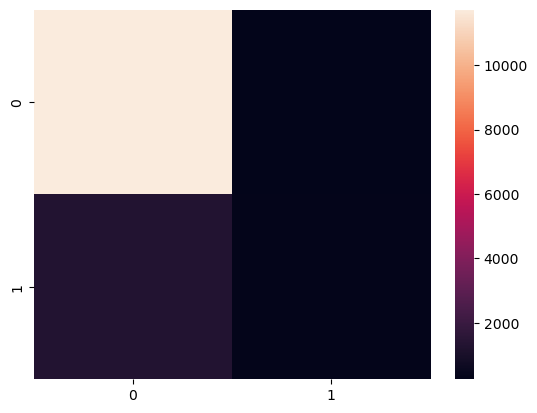

In [17]:
#heatmap shows the classification or prediction 
sns.heatmap(confusion_matrix(y_test,test_prdct));

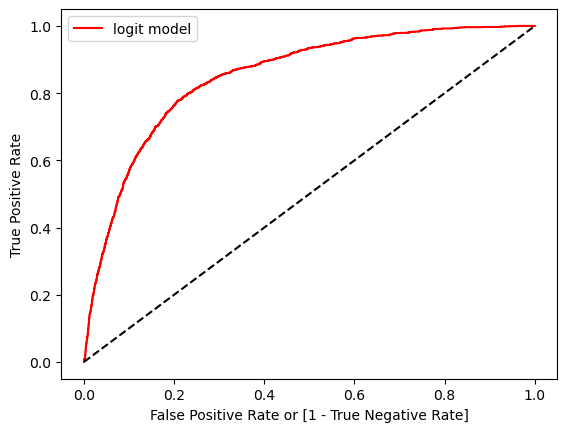

In [18]:
#ploting the roc curve by using probability of model prediction 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#fpr:false positive rate,tpr:true positive rate
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba (X_test)[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_prdct))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.56      0.20      0.29      1595

    accuracy                           0.89     13564
   macro avg       0.73      0.59      0.62     13564
weighted avg       0.86      0.89      0.86     13564

